In [22]:
import numpy as np
import torch as th
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
from torchvision.io import read_image
from pathlib import Path

plt.rcParams["savefig.bbox"] = 'tight'
plt.rcParams["figure.figsize"] = (20, 20)   # figsize

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
        

# Shadow Manipulation

Face:  255 0
Reshadow:  255 0
Shape:  (256, 256)
Shadow Diff:  255 0
Unique:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21 207 214 215 216 217 218 219 220 222 223 224 225 226 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255]


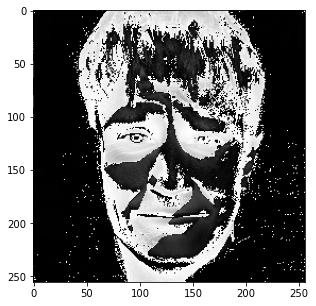

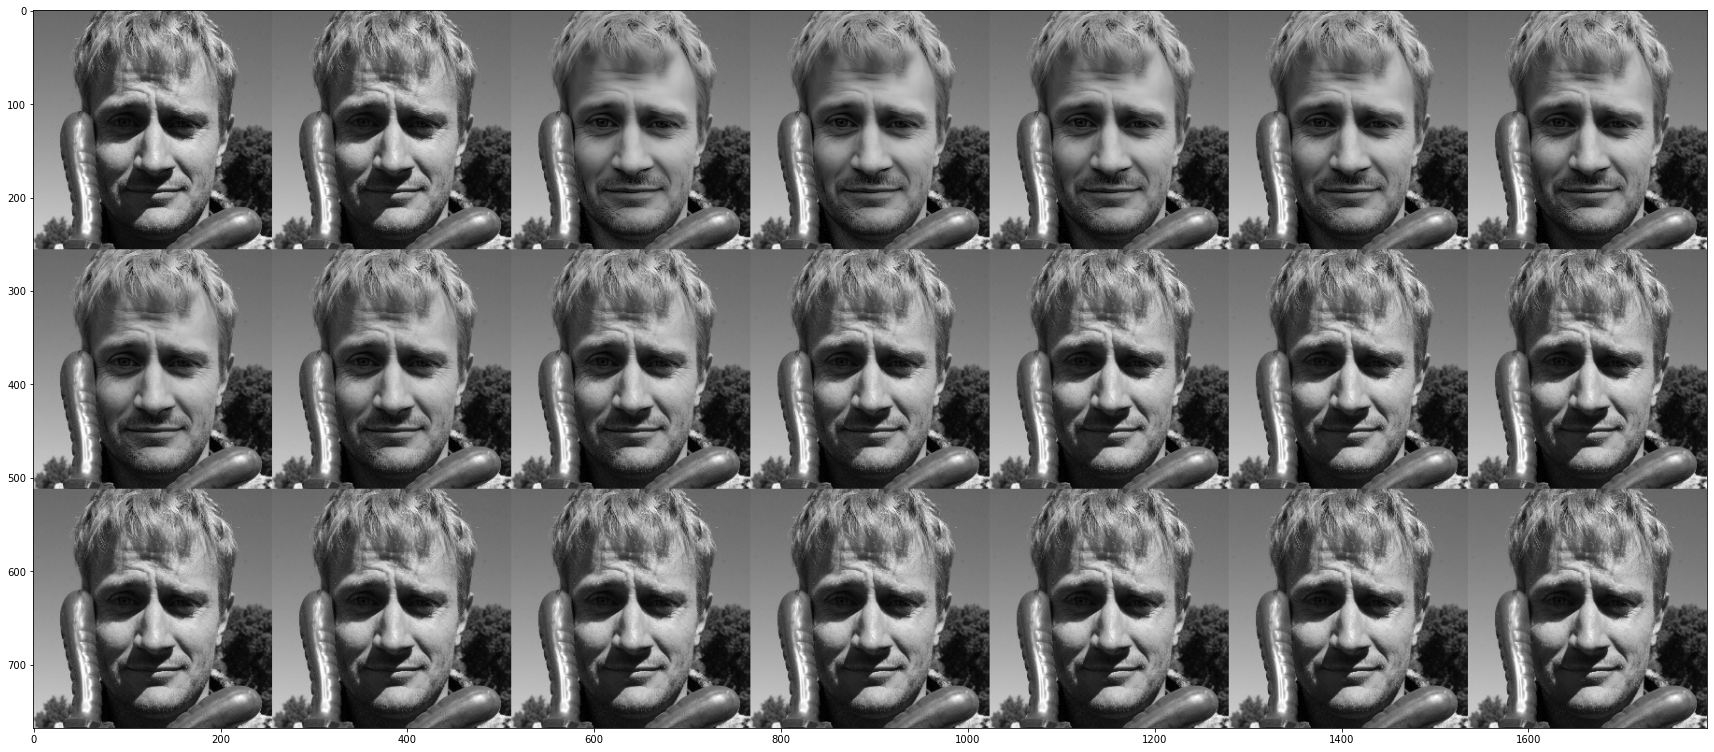

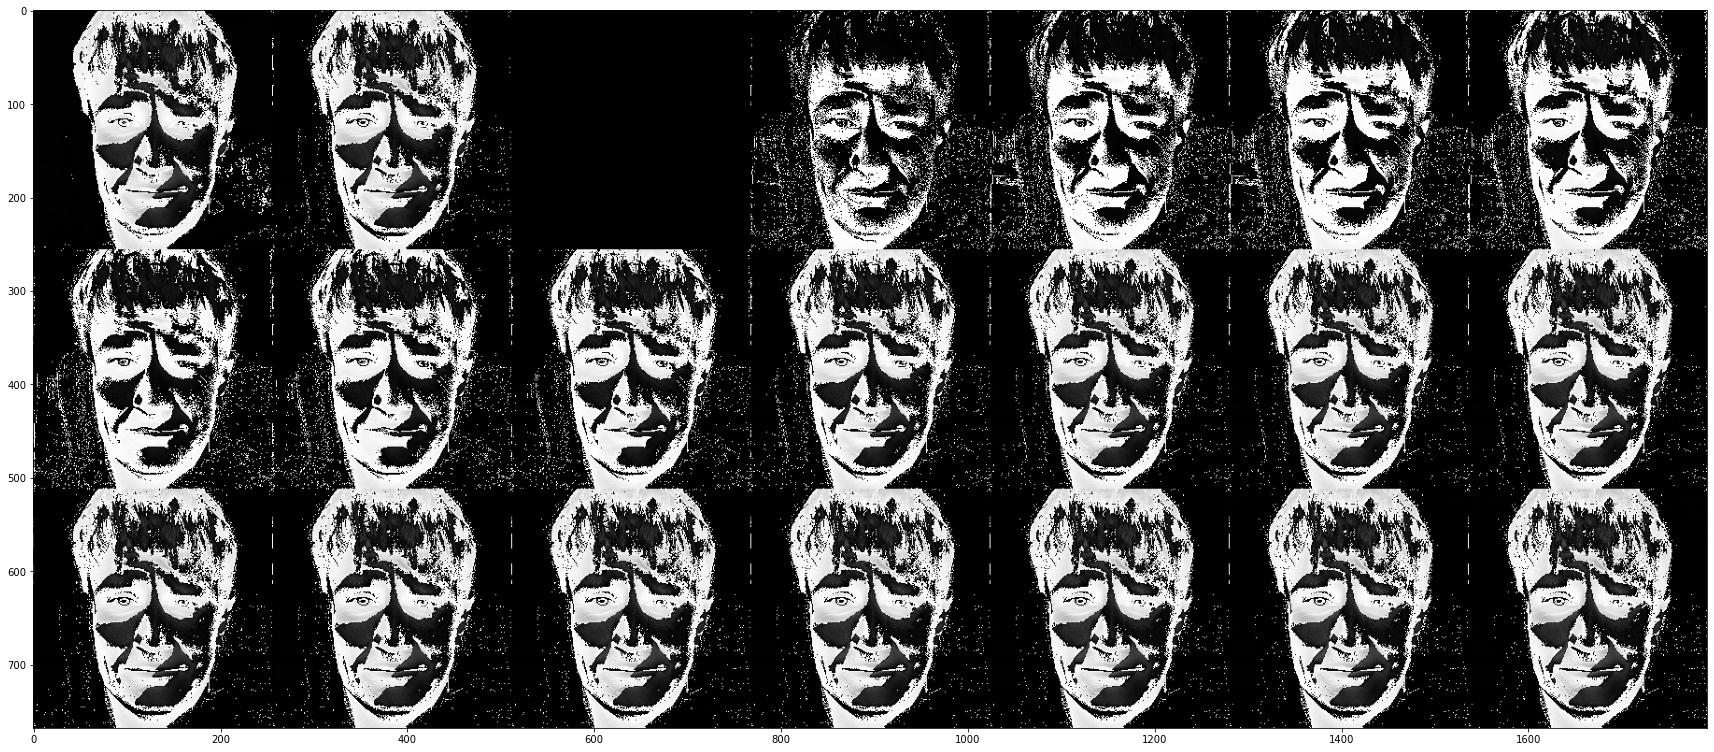

In [77]:
# Dataset
data_path = '/data/mint/DPM_Dataset/ffhq_256_with_anno/'
set_ = 'valid'

# Sampling
reshadow_path = '/data/mint/sampling/Generated_reshadow_mintomax/log=Masked_Face_woclip+BgNoHead+shadow_256_cfg=Masked_Face_woclip+BgNoHead+shadow_256.yaml_steps250/ema_085000/valid/shadow/reverse_sampling/'
img_id = '60065'
n_frames = 20

face = f'{data_path}/ffhq_256/{set_}/{img_id}.jpg'
face_img = Image.open(face)
print("Face: ", np.max(face_img), np.min(face_img))

reshadow_img = [Image.open(f'{reshadow_path}/src={img_id}.jpg/dst=60000.jpg/Lerp_1000/n_frames={n_frames}/res_frame{f}.png') for f in range(n_frames)]
print("Reshadow: ", np.max(reshadow_img[1]), np.min(reshadow_img[1]))

def create_image_grid(images, n_rows):
    """
    Creates a grid of images from a list of NumPy arrays.
    
    Parameters:
    - images: List of np.array, each representing an image.
    - n_rows: Number of rows in the grid.
    
    Returns:
    - A matplotlib figure containing the image grid.
    """
    n_images = len(images)
    n_cols = (n_images + n_rows - 1) // n_rows  # Calculate number of columns needed
    
    # Get the height and width of the images (assuming all images are the same size)
    img_height, img_width = images[0].shape[:2]

    # Add zero images if the number of images is less than needed to fill the grid
    images += [np.zeros_like(images[0]) for _ in range(n_rows * n_cols - n_images)]
    
    # Create the grid by concatenating images
    rows = []
    for i in range(n_rows):
        row_images = images[i * n_cols:(i + 1) * n_cols]
        rows.append(np.concatenate(row_images, axis=1))
    
    grid_image = np.concatenate(rows, axis=0)
    return grid_image


def get_shadow_diff(img1, img2, c_type='L'):
    # Compute Shadow Difference
    # shadow_diff = np.abs(np.array(img2.convert(c_type)) - np.array(img1.convert(c_type)))
    shadow_diff = np.array(img2.convert(c_type)) - np.array(img1.convert(c_type))
    return shadow_diff


c_type = 'L'
# c_type = 'RGB'
# Compute Shadow Difference
shadow_diff = get_shadow_diff(face_img, reshadow_img[-1], c_type=c_type)
print("Shape: ", shadow_diff.shape)
print("Shadow Diff: ", np.max(shadow_diff), np.min(shadow_diff))
print("Unique: ", np.unique(shadow_diff))

out = []
reshadow_img = [face_img] + reshadow_img
for i in range(len(reshadow_img)):
    # out.append(get_shadow_diff(img1=face_img, img2=reshadow_img[i], c_type=c_type))
    out.append(get_shadow_diff(img1=reshadow_img[2], img2=reshadow_img[i], c_type=c_type))

plt.figure(figsize=(5, 5))
# plt.imshow(out[-1])
plt.imshow(out[-1], cmap='gray')
plt.show()

out_grid = create_image_grid([np.array(tmp.convert(c_type)) for tmp in reshadow_img], n_rows=3)
plt.figure(figsize=(30, 30))
# plt.imshow(out_grid)
plt.imshow(out_grid, cmap='gray')
plt.show()

out_grid = create_image_grid(out, n_rows=3)
plt.figure(figsize=(30, 30))
# plt.imshow(out_grid)
plt.imshow(out_grid, cmap='gray')
plt.show()

